In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing the stock data

In [ ]:
data = pd.read_csv("AAPL.csv")
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

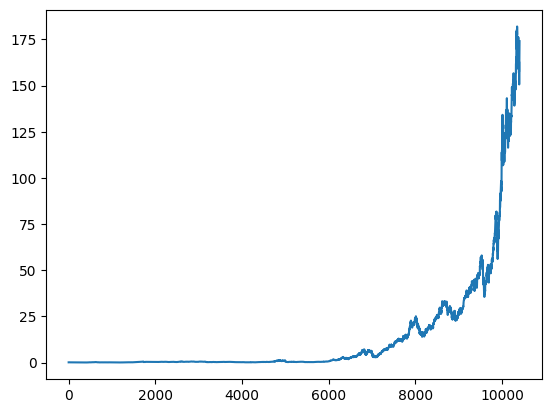

In [85]:
plt.plot(df['Close'])

Training LSTM model

In [86]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error

In [87]:
scaler = MinMaxScaler()
data = df['Close'].values
data = scaler.fit_transform(data.reshape(-1, 1))

In [88]:
from sklearn.model_selection import train_test_split

sequence_length = 10  # Number of time steps to look back
X, y = [], []
for i in range(sequence_length, len(data)):
    X.append(data[i - sequence_length:i])
    y.append(data[i])

X, y = np.array(X), np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, shuffle=False)

In [89]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=64)

X_test, y_test = np.array(X_test), np.array(y_test)

Epoch 1/20
130/130 [==============================] - 5s 12ms/step - loss: 6.5484e-05
Epoch 2/20
130/130 [==============================] - 2s 13ms/step - loss: 1.6343e-06
Epoch 3/20
130/130 [==============================] - 2s 13ms/step - loss: 1.8331e-06
Epoch 4/20
130/130 [==============================] - 2s 15ms/step - loss: 1.7615e-06
Epoch 5/20
130/130 [==============================] - 2s 12ms/step - loss: 1.7420e-06
Epoch 6/20
130/130 [==============================] - 2s 12ms/step - loss: 2.1419e-06
Epoch 7/20
130/130 [==============================] - 2s 13ms/step - loss: 2.3361e-06
Epoch 8/20
130/130 [==============================] - 2s 13ms/step - loss: 1.7902e-06
Epoch 9/20
130/130 [==============================] - 2s 12ms/step - loss: 2.1568e-06
Epoch 10/20
130/130 [==============================] - 1s 11ms/step - loss: 1.7067e-06
Epoch 11/20
130/130 [==============================] - 2s 14ms/step - loss: 2.2137e-06
Epoch 12/20
130/130 [==============================]

making Predictions

In [ ]:
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)  # Inverse scaling

# Calculate the Mean Squared Error
y_test = scaler.inverse_transform(y_test)

mse = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mse}")

65/65 [==============================] - 1s 5ms/step
Mean Absolute Error: 2.8726378372785124


Plotting the actual vs. predicted stock prices

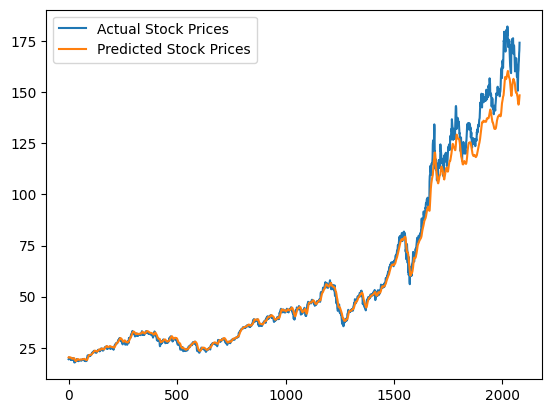

In [91]:
plt.plot(y_test, label='Actual Stock Prices')
plt.plot(y_pred, label='Predicted Stock Prices')
plt.legend()
plt.show()